<a href="https://colab.research.google.com/github/vale158/DataScience/blob/master/DL_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 1. Aprendizaje Profundo

Sonia López Rito/ 183349

---
**Objetivo:** Entrenar un modelo MLP para predecir la salida de una compuerta lógica dadas dos entradas binarias (XOR).

Para simplificar  el problema usamos entradas de valores reales en lugar de entradas binarias. Cuando los valores de entrada tengan el mismo signo, la salida debe ser uno, si los valores de entrada tienen signo distinto, la salida debe ser cero.

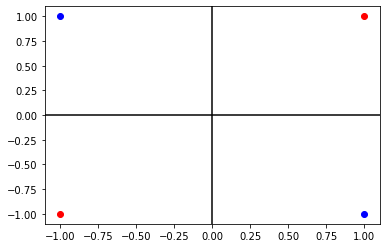

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Entrada del perceptron multicapa  (MLP)
X = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# Salida del MLP
y = np.array([[0], [1], [0], [1]])

# Gráfica del training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(X[i][0], X[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

Dado que estos puntos no son separables linealmente, no podemos encontrar una línea que clasifique a los puntos correctamente, construiremos un perceptron multicapa no lineal para hacer predicciones.

Definimos la función de activación, en este caso será la función sigmoide

In [ ]:
# Función Sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función Sigmoide
def derivative_sigmoid(x):
    return x * (1 - x)

El MLP consiste de una capa oculta y una capa de salida para mapear el vector oculto a los valores de salida.

Primero inicializamos los pesos y el sesgo de cada capa así como las épocas de entrenamiento y la tasa de aprendizaje.

In [ ]:
epoch = 5000 
learning_rate = 0.1

# Dimensión de cada capa
d_in = X.shape[1] # Carácteristicas
d_h = 3   # Capa oculta
d_out = 1 # Capa de salida

# Pesos y sesgo 
wh = np.random.uniform(size=(d_in, d_h))
bh = np.random.uniform(size=(1, d_h))
wout = np.random.uniform(size=(d_h, d_out))
bout = np.random.uniform(size=(1, d_out))

Para cada iteración de entrenamiento nos acercamos un paso para obtener el valor predecido y calcular la pérdida entre la predicción y el valor real. Usaremos la diferencia entre dos valores para como la función de pérdida. Entonces podemos calcular los gradientes y finalmente actualizar las ponderaciones y sesgos (bias).

In [ ]:
for i in range(epoch):
    # Forwardpass
    h = sigmoid(X.dot(wh) + bh)
    y_pred = sigmoid(h.dot(wout) + bout)
    
    # Función de pérdida
    loss = (y_pred - y).sum()
    if i % 500 == 0:
        print('Epoch', i, ':', loss)

    # Backpropagation 
    grad_y_pred = (y - y_pred) * derivative_sigmoid(y_pred)
    grad_wout = h.T.dot(grad_y_pred)
    grad_bout = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_h = grad_y_pred.dot(wout.T) * derivative_sigmoid(h)
    grad_wh = X.T.dot(grad_h)
    grad_bh = np.sum(grad_h, axis=0, keepdims=True)

    # Actualización de pesos y sesgo
    wout += grad_wout * learning_rate
    bout += grad_bout * learning_rate
    wh += grad_wh * learning_rate
    bh += grad_bh * learning_rate
    
print('Prediction of training data:')
print(y_pred)

Epoch 0 : 1.3738782577319841
Epoch 500 : 0.013324441264700004
Epoch 1000 : 0.04108653139490659
Epoch 1500 : 0.0704150838117753
Epoch 2000 : 0.021180472255469374
Epoch 2500 : 0.024149511532678802
Epoch 3000 : 0.021443771621126484
Epoch 3500 : 0.018294752093744843
Epoch 4000 : 0.015928912650717664
Epoch 4500 : 0.014162613223383441
Prediction of training data:
[[0.06871203]
 [0.93242838]
 [0.07913578]
 [0.93252943]]


Los valores predichos son cercanos a los datos de entrenamiento. Ya que son valores reales para obtener la salida binaria, podemos simplemente establecer el umbral de salida para decidir cual etiqueta podemos asignar.